In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv("Heart_attack_risk_prediction.csv")
df

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df.head()

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.describe()

,Patient_ID,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_ID        43400 non-null  int64  
 1   Gender            43400 non-null  object 
 2   Age               43400 non-null  float64
 3   HyperTension      43400 non-null  int64  
 4   Heart_Disease     43400 non-null  int64  
 5   Is_Married        43400 non-null  object 
 6   Employment_Type   43400 non-null  object 
 7   Residential_type  43400 non-null  object 
 8   Glucose_Levels    43400 non-null  float64
 9   BMI_Values        41938 non-null  float64
 10  Smoking_Habits    30108 non-null  object 
 11  Heart_Attack      43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
df.isnull().sum()

Patient_ID              0
Gender                  0
Age                     0
HyperTension            0
Heart_Disease           0
Is_Married              0
Employment_Type         0
Residential_type        0
Glucose_Levels          0
BMI_Values           1462
Smoking_Habits      13292
Heart_Attack            0
dtype: int64

In [7]:
df.drop(columns=['Patient_ID' ],inplace=True)

In [8]:
df

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [9]:
df["BMI_Values"].skew()

0.8987282500249906

In [10]:
df["BMI_Values"]=df["BMI_Values"].fillna(df["BMI_Values"].median())

In [11]:
df["Smoking_Habits"].value_counts()

Smoking_Habits
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [12]:
df["Smoking_Habits"]=df["Smoking_Habits"].fillna(value='never smoked')

In [13]:
df.isnull().sum()

Gender              0
Age                 0
HyperTension        0
Heart_Disease       0
Is_Married          0
Employment_Type     0
Residential_type    0
Glucose_Levels      0
BMI_Values          0
Smoking_Habits      0
Heart_Attack        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            43400 non-null  object 
 1   Age               43400 non-null  float64
 2   HyperTension      43400 non-null  int64  
 3   Heart_Disease     43400 non-null  int64  
 4   Is_Married        43400 non-null  object 
 5   Employment_Type   43400 non-null  object 
 6   Residential_type  43400 non-null  object 
 7   Glucose_Levels    43400 non-null  float64
 8   BMI_Values        43400 non-null  float64
 9   Smoking_Habits    43400 non-null  object 
 10  Heart_Attack      43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [15]:
df_cat=df.select_dtypes(include=[object])
df_cat

,Gender,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,No,children,Rural,never smoked
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,never smoked
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,never smoked
...,...,...,...,...,...
43395,Female,No,children,Urban,never smoked
43396,Female,Yes,Govt_job,Urban,formerly smoked
43397,Female,Yes,Private,Urban,formerly smoked
43398,Male,Yes,Private,Urban,never smoked


In [16]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0
43396,56.0,0,0,213.61,55.4,0
43397,82.0,1,0,91.94,28.9,0
43398,40.0,0,0,99.16,33.2,0


In [17]:
mn=MinMaxScaler()
c=mn.fit_transform(df_num)
df_num_mn=pd.DataFrame(c,columns=df_num.columns)
df_num_mn

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack
0,0.035645,0.0,0.0,0.169964,0.090286,0.0
1,0.707031,1.0,0.0,0.139631,0.332571,0.0
2,0.096680,0.0,0.0,0.236772,0.085714,0.0
3,0.853516,0.0,0.0,0.059479,0.294857,0.0
4,0.169922,0.0,0.0,0.450244,0.102857,0.0
...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,0.0
43396,0.682617,0.0,0.0,0.671934,0.517714,0.0
43397,1.000000,1.0,0.0,0.156492,0.214857,0.0
43398,0.487305,0.0,0.0,0.187079,0.264000,0.0


In [18]:
dummy=pd.get_dummies(data=df_cat,drop_first=False)
dummy=dummy.astype(int)
dummy

,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [19]:
df_pre=pd.concat([df_num_mn,dummy],axis=1)

In [20]:
df_pre

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,...,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,0.0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.707031,1.0,0.0,0.139631,0.332571,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0.096680,0.0,0.0,0.236772,0.085714,0.0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,0.853516,0.0,0.0,0.059479,0.294857,0.0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0.169922,0.0,0.0,0.450244,0.102857,0.0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,0.0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
43396,0.682617,0.0,0.0,0.671934,0.517714,0.0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,1.000000,1.0,0.0,0.156492,0.214857,0.0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,0.487305,0.0,0.0,0.187079,0.264000,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [21]:
df1 = df_pre.copy()
df1

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,...,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,0.0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.707031,1.0,0.0,0.139631,0.332571,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0.096680,0.0,0.0,0.236772,0.085714,0.0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,0.853516,0.0,0.0,0.059479,0.294857,0.0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0.169922,0.0,0.0,0.450244,0.102857,0.0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,0.0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
43396,0.682617,0.0,0.0,0.671934,0.517714,0.0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,1.000000,1.0,0.0,0.156492,0.214857,0.0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,0.487305,0.0,0.0,0.187079,0.264000,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [22]:
df_pre.drop(columns=['Heart_Attack' ],inplace=True)

In [23]:
df_pre

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0.707031,1.0,0.0,0.139631,0.332571,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.096680,0.0,0.0,0.236772,0.085714,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0.853516,0.0,0.0,0.059479,0.294857,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0.169922,0.0,0.0,0.450244,0.102857,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,0.682617,0.0,0.0,0.671934,0.517714,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,1.000000,1.0,0.0,0.156492,0.214857,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,0.487305,0.0,0.0,0.187079,0.264000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [24]:
x=df_pre
x

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0.707031,1.0,0.0,0.139631,0.332571,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.096680,0.0,0.0,0.236772,0.085714,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0.853516,0.0,0.0,0.059479,0.294857,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0.169922,0.0,0.0,0.450244,0.102857,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,0.682617,0.0,0.0,0.671934,0.517714,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,1.000000,1.0,0.0,0.156492,0.214857,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,0.487305,0.0,0.0,0.187079,0.264000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [25]:
y=df1.iloc[:,[5]]
y

,Heart_Attack
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
43395,0.0
43396,0.0
43397,0.0
43398,0.0


In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=50,test_size=0.30,shuffle=True)

In [27]:
X_train.sort_index(ascending=True,inplace=True)
X_train

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0.707031,1.0,0.0,0.139631,0.332571,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,0.853516,0.0,0.0,0.059479,0.294857,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0.169922,0.0,0.0,0.450244,0.102857,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
5,0.572754,0.0,0.0,0.660665,0.457143,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,0.682617,0.0,0.0,0.671934,0.517714,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,1.000000,1.0,0.0,0.156492,0.214857,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,0.487305,0.0,0.0,0.187079,0.264000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [28]:
y_train.sort_index(ascending=True,inplace=True)
y_train

,Heart_Attack
0,0.0
1,0.0
3,0.0
4,0.0
5,0.0
...,...
43395,0.0
43396,0.0
43397,0.0
43398,0.0


In [29]:
X_test.sort_index(ascending=True,inplace=True)
X_test

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
2,0.096680,0.0,0.0,0.236772,0.085714,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
11,0.963379,0.0,1.0,0.008812,0.136000,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
12,0.450684,0.0,0.0,0.457361,0.334857,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
13,0.450684,0.0,0.0,0.078373,0.182857,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
18,0.536133,0.0,0.0,0.009871,0.165714,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43385,0.804688,0.0,0.0,0.157170,0.168000,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
43386,0.829102,0.0,1.0,0.248252,0.176000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
43387,0.243164,0.0,0.0,0.120186,0.187429,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
43390,0.841309,0.0,0.0,0.740733,0.241143,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0


In [30]:
y_test.sort_index(ascending=True,inplace=True)
y_test

,Heart_Attack
2,0.0
11,0.0
12,0.0
13,0.0
18,0.0
...,...
43385,0.0
43386,0.0
43387,0.0
43390,0.0


In [31]:
import statsmodels.api as sm
MLR_model1=sm.OLS(y_train, X_train).fit()
print(MLR_model1.summary())

                            OLS Regression Results                            
Dep. Variable:           Heart_Attack   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     79.14
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          6.16e-239
Time:                        09:22:33   Log-Likelihood:                 18554.
No. Observations:               30380   AIC:                        -3.708e+04
Df Residuals:                   30364   BIC:                        -3.694e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Age         

In [32]:
y_test_pred=MLR_model1.predict(X_test)
y_test_pred.count()


13020

In [33]:
y_test_pred 

2       -0.012163
11       0.089807
12       0.002906
13      -0.000924
18       0.000316
           ...   
43385    0.036644
43386    0.081828
43387   -0.004247
43390    0.053353
43393    0.006692
Length: 13020, dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=y_test['Heart_Attack'],y_pred=y_test_pred)

0.0166025614628044

In [55]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred=logit.predict(X_test)
y_pred
ac1=accuracy_score(y_test,y_pred)
print(ac1*100)

98.24884792626727


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12792,     0],
       [  228,     0]], dtype=int64)

In [37]:
bias=logit.score(X_train,y_train)
bias
varience=logit.score(X_test,y_test)
varience
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9824884792626728

In [38]:
varience

0.9824884792626728

In [39]:
bias

0.9817314022383147

In [40]:
acc

0.9824884792626728

In [41]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99     12792\n         1.0       0.00      0.00      0.00       228\n\n    accuracy                           0.98     13020\n   macro avg       0.49      0.50      0.50     13020\nweighted avg       0.97      0.98      0.97     13020\n'

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1)
dtree.fit(X_train,y_train)
y_predd2=dtree.predict(X_test)
ac2=accuracy_score(y_test,y_predd2)
print(ac2*100)

98.23348694316437


In [43]:
from sklearn.metrics import precision_score

In [44]:
pss2=precision_score(y_test,y_predd2)
pss2

0.3333333333333333

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_test,y_test)
y_pred=knn.predict(X_test)
y_pred
ac3=accuracy_score(y_test,y_pred)
print(ac3*100)

98.24116743471582


In [47]:
bias=knn.score(X_train,y_train)
bias

0.9814680710994075

In [50]:
varience=knn.score(X_test,y_test)
varience

0.9824116743471583

In [51]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9824116743471583

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12790,     2],
       [  227,     1]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99     12792\n         1.0       0.33      0.00      0.01       228\n\n    accuracy                           0.98     13020\n   macro avg       0.66      0.50      0.50     13020\nweighted avg       0.97      0.98      0.97     13020\n'

<Axes: ylabel='Heart_Disease'>

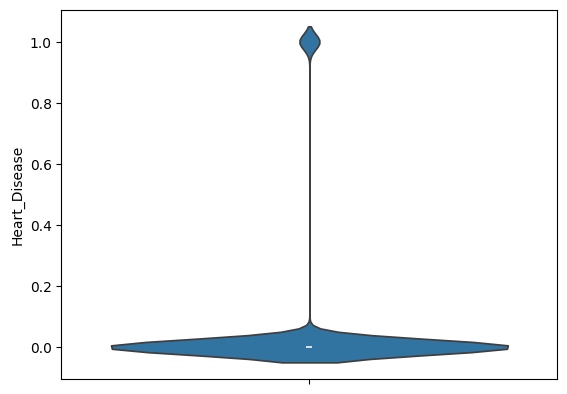

In [59]:
sns.violinplot(y='Heart_Disease',data=df)

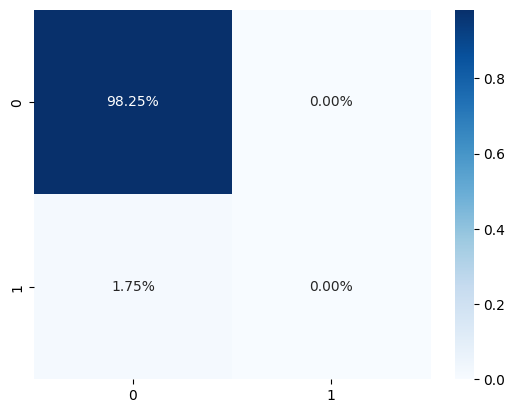

Accuracy is:  98.24884792626727


In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac*100)

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred
ac4=accuracy_score(y_test,y_pred)
print(ac4*100)

98.24884792626727


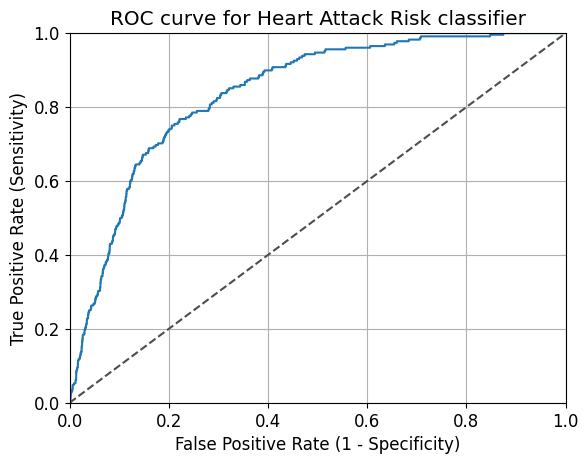

In [78]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Attack Risk classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [72]:
auc(fpr, tpr)*1

84.16151336361541

In [74]:
y_pred_quant = model.predict_proba(X_test)[:, 1]

In [76]:
y_pred_quant 

array([0.00184408, 0.07155769, 0.01200395, ..., 0.00309135, 0.05110167,
       0.00937045])